# Задание 11
Решить краевую задачу для уравнения Пуассона. Построить график решения.

## Теория

### Уравнение Пуассона

Оператор Лапласа:
$$\nabla^2u=u_{xx}+u_{yy}.$$
Уравнение Пуассона записывается в виде:
$$\nabla^2u=g(x,y).$$
Перейдем к разностной аппроксимации и получим:
$$u_{i,j} = u_{i,j}+\frac{u_{i+1,j}+u_{i-1,j}+u_{i,j+1}+u_{i,j-1}-4u_{i,j}-h^2g_{i,j}}{4}.$$

## Код

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2023)

%matplotlib widget 

Для примера возьмем следующее уравнение:
$$u_{xx}+u_{yy}=-4u,$$
в области $R=\{(x,y):0\leq x\leq 1, 0\leq y \leq 1\}$ с граничными значениями:
$$u(x,y)=\cos(2x)+\sin(2y).$$

In [2]:
def u(x,y):
    return np.cos(2*x)+np.sin(2*y)
def g(x,y):
    return -4*u(x,y)

In [3]:
num_dots_x = 10
num_dots_y = 10
x_grid = np.linspace(0,1,num_dots_x)
y_grid = np.linspace(0,1,num_dots_y)
u_values = np.zeros((num_dots_y, num_dots_x))

h = x_grid[1] - x_grid[0]

In [4]:
X, Y = np.meshgrid(x_grid, y_grid)

In [5]:
u_values[:, 0] = u(X[:,0], Y[:,0])
u_values[0, :] = u(X[0,:], Y[0,:])
u_values[:, -1] = u(X[:,-1], Y[:,-1])
u_values[-1, :] = u(X[-1,:], Y[-1,:])
u_values[1:-1,1:-1] = np.sum((u_values[:-1, 0] + u_values[0, 1:] +\
                       u_values[1:, -1] + u_values[-1, :-1]))/(2*num_dots_x+2*num_dots_y)

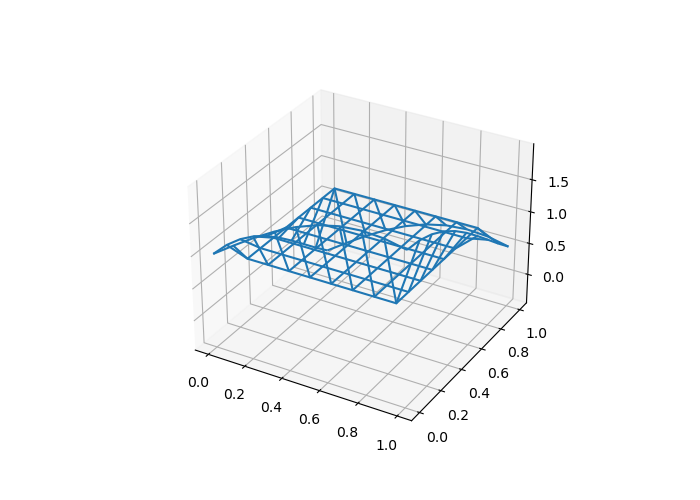

In [6]:
ax = plt.figure(figsize=(7,5)).add_subplot(projection='3d')

ax.plot_wireframe(X, Y, u_values.T)

plt.show()

$$u_{i,j} = u_{i,j}+\frac{u_{i+1,j}+u_{i-1,j}+u_{i,j+1}+u_{i,j-1}-4u_{i,j}-h^2g_{i,j}}{4}$$

In [7]:
iter_num = 20
eps = 1e-2
for iter in range(iter_num):
    early_stop = 0
    for i in range(1, num_dots_y - 1):
        for j in range(1, num_dots_x - 1):
            r_ij = (u_values[i+1,j] + u_values[i-1,j] +\
                    u_values[i,j+1] + u_values[i,j-1] -\
                    4*u_values[i,j]-h**2*g(X[i,j],Y[i,j]))/4
            if (abs(r_ij) > eps):
                early_stop += 1
            u_values[i, j] = u_values[i,j] + r_ij
    if not early_stop:
        print(f'stopped at {iter=}')
        break

stopped at iter=17


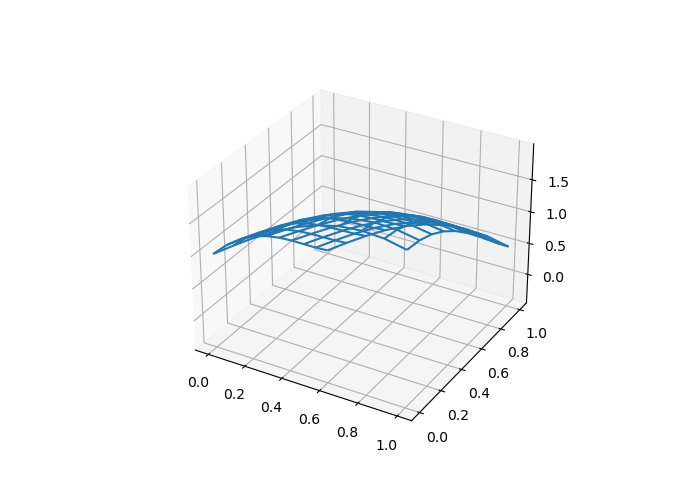

In [8]:
ax = plt.figure(figsize=(7,5)).add_subplot(projection='3d')

ax.plot_wireframe(X, Y, u_values.T)

plt.show()